## Title rank evaluation

Add imports

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import csv
from nltk.stem.porter import *
import matplotlib.pyplot as plt

stemmer = PorterStemmer()

### Read wrangled data and store into dataframe

In [15]:
file_paths = ["../wrangler/wrangled_data_part1.csv", "../wrangler/wrangled_data_part2.csv"]

df = pd.concat([pd.read_csv(path) for path in file_paths], ignore_index=True)
df.dropna(inplace=True)
df_rank = df[["Original Title", "Views"]].copy()
df_rank.head()

,Original Title,Views
0,Dharmesh Yalande Sir Dance Bastar Dist Chhatti...,8867396
1,Fed Will Likely Hike in September - Market Pul...,144
2,Hyundai i20 at 25% Discount,798201
3,PSY - GANGNAM STYLE (CONVERSELY),424
4,Firmly I Believe and Truly God is Three (Halto...,5143


Ranking function and init word rank dict.

In [11]:
with open("../eda/word_rank.csv", mode="r") as file:
    r = csv.reader(file)
    word_rank = {row[0]: float(row[1]) for row in r}

def rank_title(input):
    input = re.sub(r"[^\w\s]", "", input.lower()) # remove punctuations and change to lower
    stemmed_words = [stemmer.stem(word) for word in str(input).split()] # stemming
    return round(sum(word_rank.get(word, 0) for word in stemmed_words) / len(stemmed_words), 2)

Create word rank col

In [16]:
df_rank["Rank"] = df["Original Title"].apply(rank_title)

In [21]:
df_rank.describe()

,Views,Rank
count,4.388430e+05,438843.000000
mean,1.468892e+07,0.119474
std,5.669991e+07,0.182274
min,1.000000e+00,-1.000000
25%,8.177200e+04,0.020000
50%,9.058920e+05,0.130000
75%,8.611300e+06,0.230000
max,4.971686e+09,1.000000


Plot results

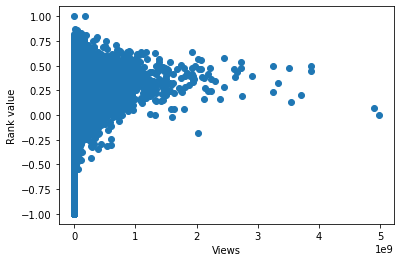

In [23]:
plt.scatter(df_rank["Views"], df_rank["Rank"])
plt.xlabel("Views")
plt.ylabel("Rank value")
plt.show()

Check correlation between Views and Rank

In [33]:
pearson_corr = df_rank["Views"].corr(df_rank["Rank"], method="pearson")
spearman_corr = df_rank["Views"].corr(df_rank["Rank"], method="spearman")

print(f"Pearson: {pearson_corr}, Spearman: {spearman_corr}")

Pearson: 0.19185373222157762, Spearman: 0.36727460506060117


Plot heatmap

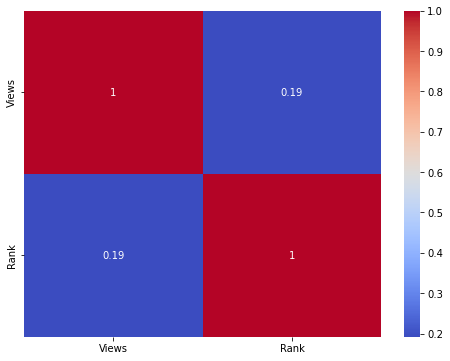

In [27]:
plt.figure(figsize=(8, 6))
sns.heatmap(df_rank[["Views", "Rank"]].corr(), annot=True, cmap="coolwarm")
plt.show()


Iterate through dataframe and compare views and values with random row.

In [30]:
TEST_SIZE = 10000
sampled_df = df_rank.sample(n=TEST_SIZE)

def compare(row):
  random_row = df_rank.sample(n=1).iloc[0]
  compare_views = row["Views"] > random_row["Views"]
  compare_rank = row["Rank"] > random_row["Rank"]

  return 1 if compare_views == compare_rank else 0

sampled_df["Comparison"] = sampled_df.apply(compare, axis=1)
correct_ranks = sampled_df["Comparison"].sum()

Check results

In [32]:
print(f"Test samples from the dataframe: {TEST_SIZE}")
print(f"Ranking was right {correct_ranks} out of {TEST_SIZE}")
print(f"Correction rate: {correct_ranks/TEST_SIZE*100:.1f}%")

Test samples from the dataframe: 10000
Ranking was right 6193 out of 10000
Correction rate: 61.9%
